**This part of the code appply feature selection on each record as a whole without dividing into windows**

 1.Import necessary libraries: `pandas` as pd

 2.Read the CSV file located at the specified file path and stores it in a Pandas DataFrame called df.
 
 3.Split the data into independent and dependent variables:

In [1]:
import pandas as pd

file_path = r"C:\Users\power\Desktop\CDSS_FinalProject\Whole_Data.csv"
df = pd.read_csv(file_path)

independents=df.drop(['target'],axis='columns')
dependent=df.target

 5.To apply ***wrapper method*** for selection we need to import some libraries `mlxtend.feature_selection`, `sklearn.svm`,`matplotlib` and `mlxtend.plotting`.
 
 6.Perform Sequential Forward Selection **(SFS)** for feature selection on the independent variables using a Support Vector Machine **(SVM)** model with a radial basis function **(RBF)** kernel. The SFS algorithm selects the best subset of features that maximizes the negative mean squared error score using 5-fold cross-validation. The resulting feature subset and their associated scores are plotted using the `plot_sequential_feature_selection function` from `mlxtend.plotting` library.
 
 7.The title of the entire figure is set to "Sequential Forward Selection SVM (w. StdErr)" using the `plt.title` method.
 
 8.The plot is displayed using the `show` function from `matplotlib`.

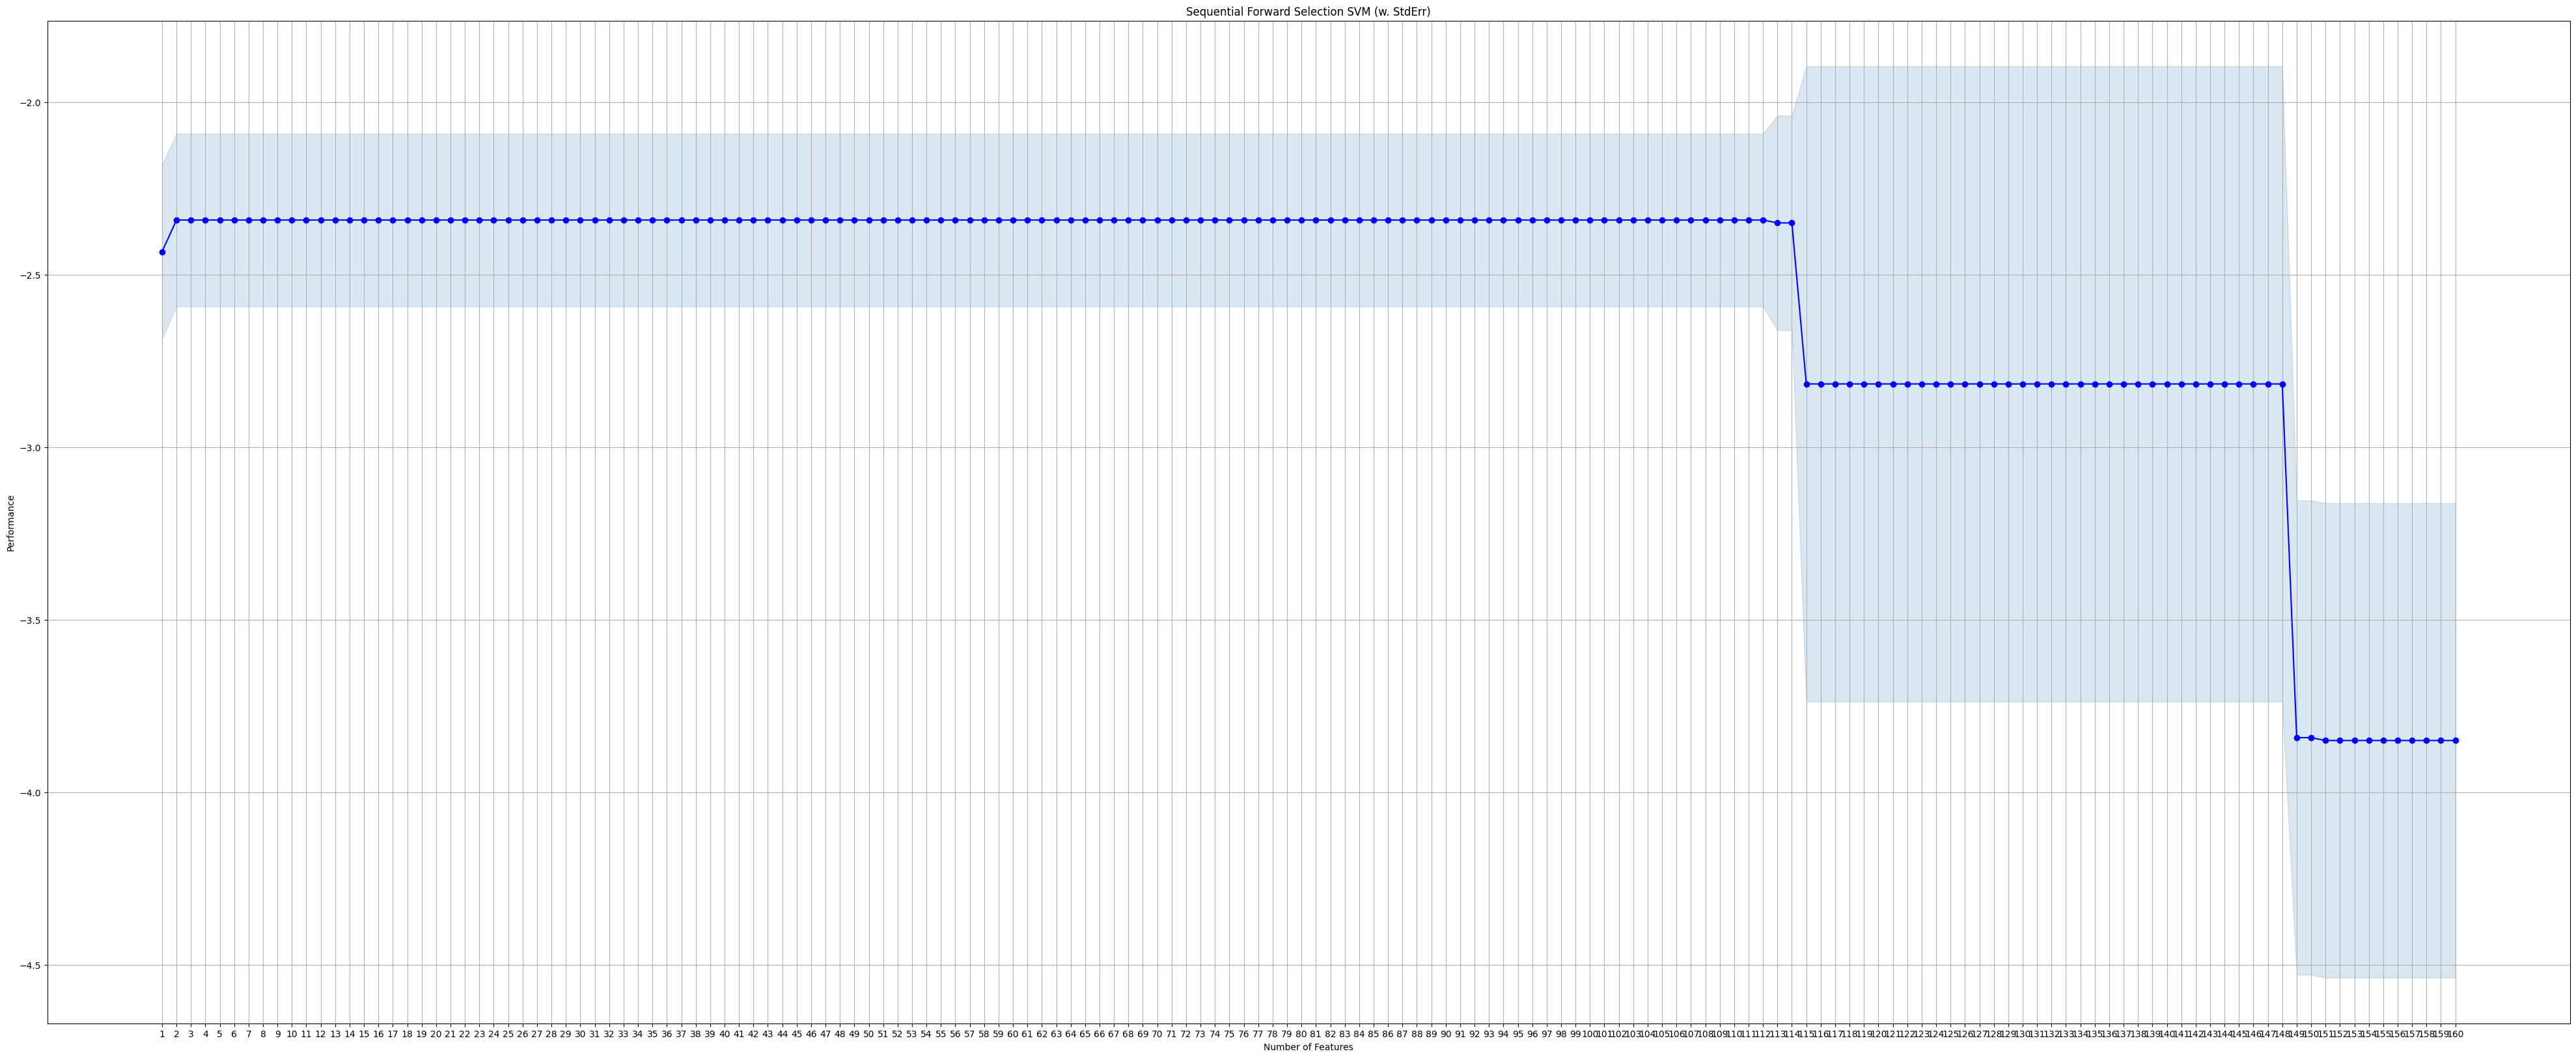

In [2]:
# Wrapper Methods for feature selection

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

gamma1 = 12/160
svm=SVC(kernel = 'rbf', C = 8, gamma = gamma1)

# Define Sequential Forward Selection (sfs)
sfs2 =SFS(svm, 
          k_features=160, 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=5)

sfs2 = sfs2.fit(independents, dependent)
fig = plot_sfs(sfs2.get_metric_dict(), kind='std_err',figsize=(50,20))

plt.title('Sequential Forward Selection SVM (w. StdErr)')
plt.grid()
plt.show()

 9.This code performs the same SFS algorithm as above, but with only 110 features, and stores the resulting feature subset and their associated scores in a Pandas DataFrame called df_SFS_results.

In [3]:
# Wrapper Methods for feature selection

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.svm import SVC

gamma1 = 12/160
svm=SVC(kernel = 'rbf', C = 8, gamma = gamma1)

# Define Sequential Forward Selection (sfs)
sfs2 =SFS(svm, 
          k_features = 110, 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=5)

sfs2 = sfs2.fit(independents, dependent)
#Create a dataframe for the SFS results 
df_SFS_results = pd.DataFrame(sfs2.subsets_).transpose()
df_SFS_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(43,)","[-3.2083333333333335, -2.7916666666666665, -2....",-2.433333,"(Number of slope sign changes (3),)"
2,"(22, 43)","[-2.4583333333333335, -3.25, -2.20833333333333...",-2.341667,"(Waveform length(2), Number of slope sign chan..."
3,"(4, 22, 43)","[-2.4583333333333335, -3.25, -2.20833333333333...",-2.341667,"(Mean absolute value (1), Waveform length(2), ..."
4,"(4, 6, 22, 43)","[-2.4583333333333335, -3.25, -2.20833333333333...",-2.341667,"(Mean absolute value (1), RMS (1), Waveform le..."
5,"(4, 6, 7, 22, 43)","[-2.4583333333333335, -3.25, -2.20833333333333...",-2.341667,"(Mean absolute value (1), RMS (1), skewness (1..."
...,...,...,...,...
106,"(4, 6, 7, 9, 11, 12, 13, 14, 15, 16, 17, 18, 1...","[-2.4583333333333335, -3.25, -2.20833333333333...",-2.341667,"(Mean absolute value (1), RMS (1), skewness (1..."
107,"(4, 6, 7, 9, 11, 12, 13, 14, 15, 16, 17, 18, 1...","[-2.4583333333333335, -3.25, -2.20833333333333...",-2.341667,"(Mean absolute value (1), RMS (1), skewness (1..."
108,"(4, 6, 7, 9, 11, 12, 13, 14, 15, 16, 17, 18, 1...","[-2.4583333333333335, -3.25, -2.20833333333333...",-2.341667,"(Mean absolute value (1), RMS (1), skewness (1..."
109,"(4, 6, 7, 9, 11, 12, 13, 14, 15, 16, 17, 18, 1...","[-2.4583333333333335, -3.25, -2.20833333333333...",-2.341667,"(Mean absolute value (1), RMS (1), skewness (1..."


 10.This code removes the features that were not selected by the SFS algorithm from the `independents` DataFrame, leaving only the selected features.

In [4]:
#new data after Sequential Forward Selection (sfs)
independents=df.drop(['target', 
                    "Number of zero crossings (1)", "Waveform length(1)", "Number of slope sign changes (1)", "Integral absolute  (1)","Activity (1)","Mobility (1)","Complexity(1)",
                    "Number of zero crossings (2)", "Number of slope sign changes (2)", "Integral absolute  (2)","Activity (2)","Complexity(2)",
                    "Number of zero crossings (3)", "Waveform length(3)", "Integral absolute  (3)","Activity (3)","Complexity(3)",
                    "Number of zero crossings (4)", "Waveform length(4)", "Number of slope sign changes (4)", "Integral absolute  (4)","Complexity(4)",
                    "Number of zero crossings (5)", "Waveform length(5)", "Number of slope sign changes (5)", "Integral absolute  (5)", 'skewness (5)',"Activity (5)","Complexity(5)",
                    "Number of zero crossings (6)", "Waveform length(6)", "Number of slope sign changes (6)",  "Integral absolute  (6)",'skewness (6)',"Activity (6)","Complexity(6)",
                    "Number of zero crossings (7)", "Waveform length(7)", "Number of slope sign changes (7)",  "Integral absolute  (7)", 'RMS (7)','skewness (7)',"Activity (7)","Complexity(7)",
                    "Number of zero crossings (8)", "Waveform length(8)", "Number of slope sign changes (8)", "Integral absolute  (8)", 'skewness (8)',"Activity (8)","Complexity(8)",],axis='columns')
dependent=df.target

 11.This code performs Linear Discriminant Analysis **(LDA)** on the selected features to reduce their dimensionality to 2 components. The resulting transformed features are stored in a new DataFrame called `independents_r`.

In [5]:
#Using LDA for dimensionality reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# initializing the model with 2 components
lda = LinearDiscriminantAnalysis(n_components=2)
# fitting the dataset
independents_r= lda.fit(independents, dependent).transform(independents)

 12.Plot the reduced dataset using the two LDA components:
 This code creates a scatter plot of the transformed features, where the x-axis represents the first LDA component and the y-axis represents the second LDA component. Each data point is colored according to its value in the target variable.

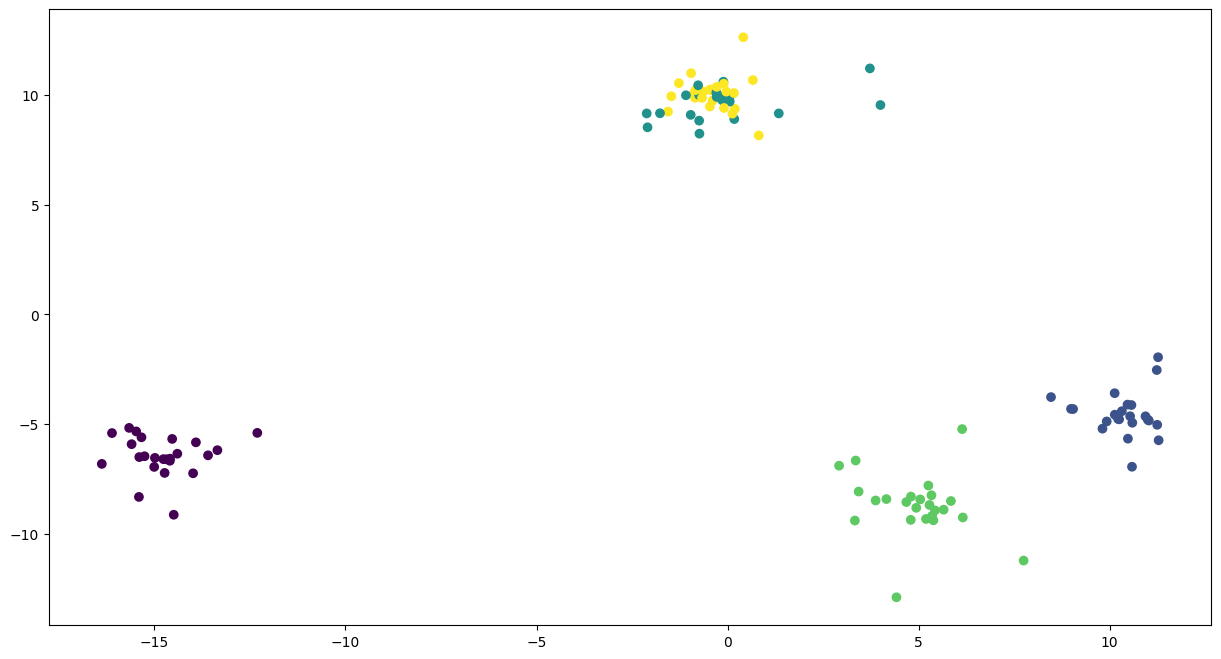

In [6]:
#Plotting the dataset
import matplotlib.pyplot as plt
# plot size
plt.figure(figsize=(15, 8))
# plotting the graph
plt.scatter(independents_r[:,0],independents_r[:,1],  c=dependent)
plt.show()

 13.This code creates box plots of the LDA components, separated by the values in the target variable. The first box plot shows the distribution of the first LDA component (`ld1`) and the second box plot shows the distribution of the second LDA component (`ld2`). The box plots are created using the seaborn library.

<AxesSubplot: xlabel='class', ylabel='ld2'>

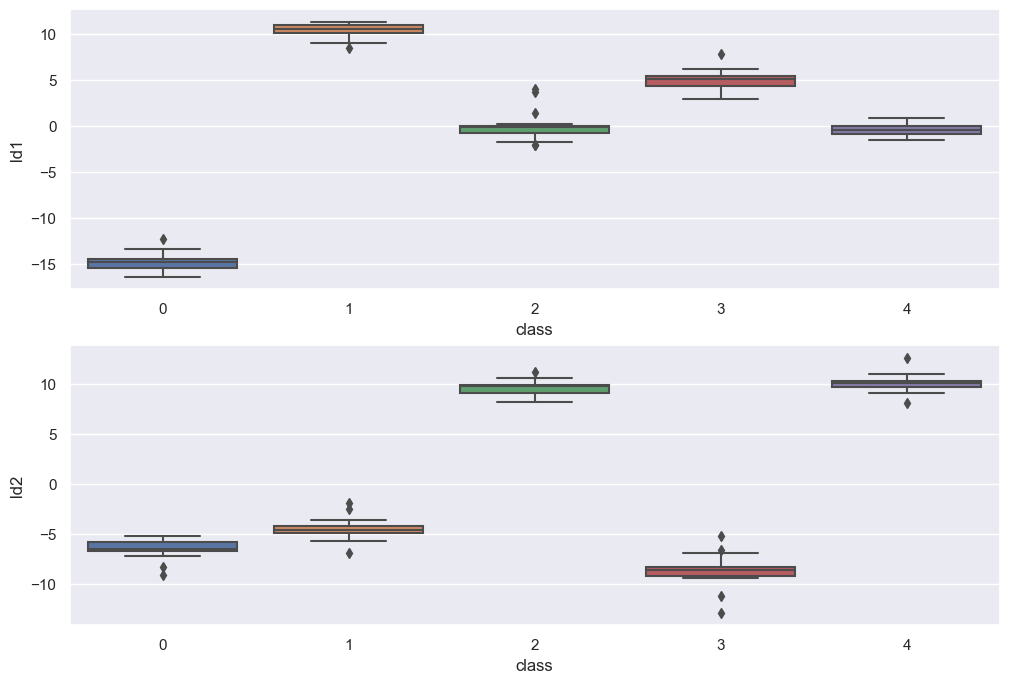

In [7]:
#Distribution of LDA components
import seaborn as sns
# creating the dataframe
df=pd.DataFrame(zip(independents_r[:,0],independents_r[:,1],dependent),columns=["ld1","ld2","class"])
# setting the size of the image
sns.set(rc={'figure.figsize':(12,8)})
# plotting the graphs
fig, axes = plt.subplots(2, 1)
sns.boxplot(x='class', y='ld1', data=df,ax=axes[0])
sns.boxplot(x='class', y='ld2', data=df,ax=axes[1])

 14.now we do selection using ***Step wise*** technique

 15.Import `pandas` library to work with data and read the CSV file "Whole_Data.csv".

 16.Split the data into two parts: "independents" and "dependent", where "independents" contains all the features except the target variable and "dependent" contains only the target variable.

In [8]:
import pandas as pd

file_path = r"C:\Users\power\Desktop\CDSS_FinalProject\Whole_Data.csv"
df = pd.read_csv(file_path)

independents=df.drop(['target'],axis='columns')
dependent=df.target

 17.Import the `SequentialFeatureSelector` class from the `mlxtend.feature_selection` module and the `SVC` class from the `sklearn.svm` module. Then, create an instance of the **"SVC"** class with a radial basis function **(RBF)** kernel, and set the value of the gamma parameter to 12/160.

 18.Use the `SequentialFeatureSelector` class to perform **step-wise** feature selection with **svm** as the estimator. Set the number of selected features to 110, enable forward and floatingselection, and use "r2" as the scoring metric. Finally, fit the **SFS** object to the "independents" and "dependent" data.

19.Create a new dataframe "df_SFFS_results" from the "subsets_" attribute of the **SFS** object to see the results of step-wise feature selection.

In [9]:
# Step wise Selection

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.svm import SVC

gamma1 = 12/160
svm=SVC(kernel = 'rbf', C = 8, gamma = gamma1)

# step-wise Selection
sffs = SFS(svm ,
           k_features=110,
           forward=True,
           floating=True,
           scoring = 'r2',
           cv = 0)
#Use SFFS to select the top 110 features 
sffs.fit(independents, dependent)

#Create a dataframe for the SFS results 
df_SFFS_results = pd.DataFrame(sffs.subsets_).transpose()
df_SFFS_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(0,)",[1.0],1.0,"(Unnamed: 0,)"
2,"(0, 1)",[1.0],1.0,"(Unnamed: 0, Number of zero crossings (1))"
3,"(0, 1, 2)",[1.0],1.0,"(Unnamed: 0, Number of zero crossings (1), Wav..."
4,"(0, 1, 2, 3)",[1.0],1.0,"(Unnamed: 0, Number of zero crossings (1), Wav..."
5,"(0, 1, 2, 3, 4)",[1.0],1.0,"(Unnamed: 0, Number of zero crossings (1), Wav..."
...,...,...,...,...
106,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[1.0],1.0,"(Unnamed: 0, Number of zero crossings (1), Wav..."
107,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[1.0],1.0,"(Unnamed: 0, Number of zero crossings (1), Wav..."
108,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[1.0],1.0,"(Unnamed: 0, Number of zero crossings (1), Wav..."
109,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[1.0],1.0,"(Unnamed: 0, Number of zero crossings (1), Wav..."


 20.Remove the features that were not selected by the step-wise feature selection process from the `independents` dataframe.

In [10]:
# new data after Step-Wise Selection
independents=df.drop(['target', 
                     "Integral absolute  (5)", 'RMS (5)','skewness (5)',"Activity (5)","Mobility (5)","Complexity(5)",
                    "Number of zero crossings (6)", "Waveform length(6)", "Number of slope sign changes (6)", "Mean absolute value (6)", "Integral absolute  (6)", 'RMS (6)','skewness (6)',"Activity (6)","Mobility (6)","Complexity(6)",
                    "Number of zero crossings (7)", "Waveform length(7)", "Number of slope sign changes (7)", "Mean absolute value (7)", "Integral absolute  (7)", 'RMS (7)','skewness (7)',
                    "AR model P2(5)","AR model P3(5)","AR model P4(5)","AR model P5(5)","AR model P6(5)","AR model P7 (5)","AR model P8 (5)","AR model P9(5)","AR model P10(5)","AR model P11(5)",
                    "AR model P2(6)","AR model P3(6)","AR model P4(6)","AR model P5(6)","AR model P6(6)","AR model P7 (6)","AR model P8 (6)","AR model P9(6)","AR model P10(6)","AR model P11(6)",
                   "AR model P4(8)","AR model P5(8)","AR model P6(8)","AR model P7 (8)","AR model P8 (8)","AR model P9 (8)","AR model P10(8)","AR model P11(8)"],axis='columns')
dependent=df.target

 21.Import the L`inearDiscriminantAnalysis` class from the `sklearn.discriminant_analysis` module. Initialize an instance of the `LinearDiscriminantAnalysis` class with 2 components and fit the model to the "independents" and "dependent" data
from `sklearn.discriminant_analysis `import `LinearDiscriminantAnalysis`

In [11]:
#Using LDA for dimensionality reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# initializing the model with 2 components
lda = LinearDiscriminantAnalysis(n_components=2)
# fitting the dataset
independents_r= lda.fit(independents, dependent).transform(independents)

 22.Plot the dataset using the `matplotlib` library, where "independents_r[:,0]" and "independents_r[:,1]" are the two components from the LDA model, and "dependent" is the target variable. The "scatter" function is used to create a scatter plot with different colors for different target values.

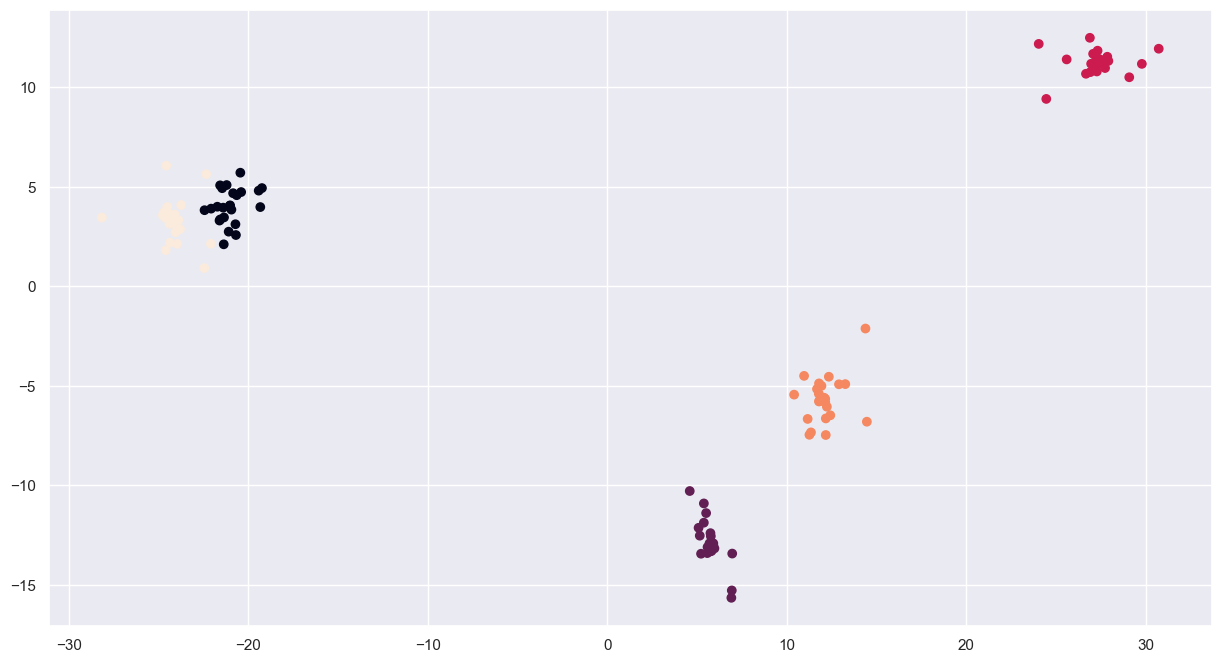

In [12]:
#Plotting the dataset
import matplotlib.pyplot as plt
# plot size
plt.figure(figsize=(15, 8))
# plotting the graph
plt.scatter(independents_r[:,0],independents_r[:,1],  c=dependent)
plt.show()

 23.Import the `seaborn `library to create boxplots of the LDA components for each target class. Create a new dataframe "df" with "independents_r[:,0]", "independents_r[:,1]", and "dependent" as columns. Then, plot the boxplots using the "sns.boxplot" function with "class" as the x-axis and (`ld1 `)or (`ld2`) as the y-axis.

<AxesSubplot: xlabel='class', ylabel='ld2'>

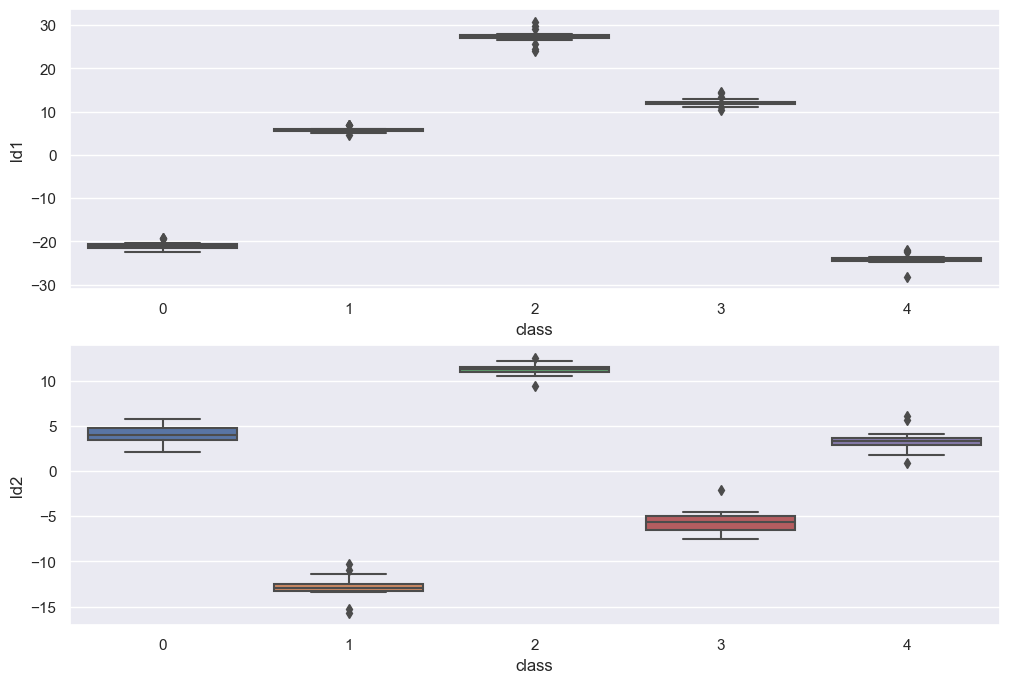

In [13]:
#Distribution of LDA components
import seaborn as sns
# creating the dataframe
df=pd.DataFrame(zip(independents_r[:,0],independents_r[:,1],dependent),columns=["ld1","ld2","class"])
# setting the size of the image
sns.set(rc={'figure.figsize':(12,8)})
# plotting the graphs
fig, axes = plt.subplots(2, 1)
sns.boxplot(x='class', y='ld1', data=df,ax=axes[0])
sns.boxplot(x='class', y='ld2', data=df,ax=axes[1])